# Challenge 3

In [5]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)
%matplotlib inline


0.10.1


#### Import the titanic file. Name your dataset `titanic`.

In [6]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [7]:
#your code here
#titanic[['Gender','Pclass']]=titanic[['Gender','Pclass']].astype('category')
cat_list = ['Survived','Gender','Embarked']
for cat in cat_list:
    titanic[cat] = titanic[cat].astype('category') 
titanic.dtypes

PassengerId       int64
Survived       category
Pclass            int64
Name             object
Gender         category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [8]:
# your code here- numerical variable
titanic.select_dtypes(include = ['int64','float64'])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.000000,1,0,7.2500
1,2,1,38.000000,1,0,71.2833
2,3,3,26.000000,0,0,7.9250
3,4,1,35.000000,1,0,53.1000
4,5,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
1304,1305,3,29.513190,0,0,8.0500
1305,1306,1,39.000000,0,0,108.9000
1306,1307,3,38.500000,0,0,7.2500
1307,1308,3,29.513190,0,0,8.0500


In [9]:
#your code here- categorical variable
titanic.select_dtypes(include = ['category'])

,Survived,Gender,Embarked
0,0.0,male,S
1,1.0,female,C
2,1.0,female,S
3,1.0,female,S
4,0.0,male,S
...,...,...,...
1304,NaN,male,S
1305,NaN,female,C
1306,NaN,male,S
1307,NaN,male,S


In [10]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1309.0,29.879186,13.448335,0.17,22.0000,28.5000,37.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.4542,31.275,512.3292


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [11]:
# your code here
plt.style.use('classic')
plt.figure(figsize = (20,6))

<Figure size 1600x480 with 0 Axes>

<Figure size 1600x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

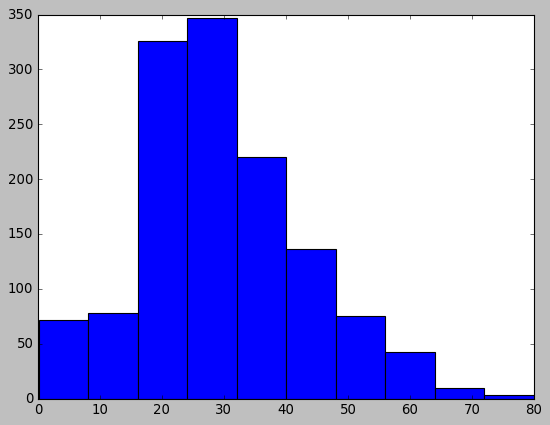

In [105]:
# your code here
plt.hist(titanic['Age'],bins=10);

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

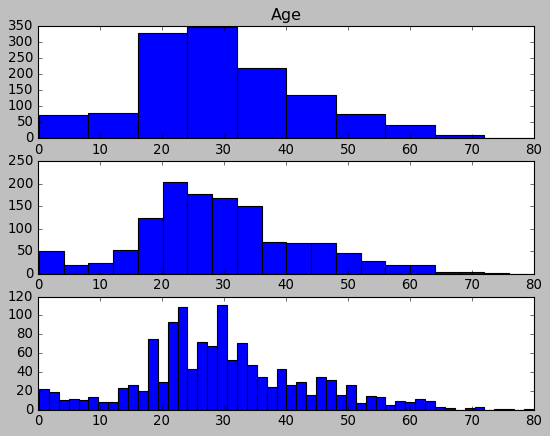

In [12]:
# your code here
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.title.set_text('Age')
ax1.hist(titanic['Age'],bins=10)
ax2.hist(titanic['Age'],bins=20)
ax3.hist(titanic['Age'],bins=50);

#### Whether the bin size affects your plot? Why?

In [83]:
#your comment here
#El número de bin determina el número de barras que se muestran en el histograma. A mayor número de
#bin mayor número de barras. 

#### Use seaborn to show the distribution of the column `Age`

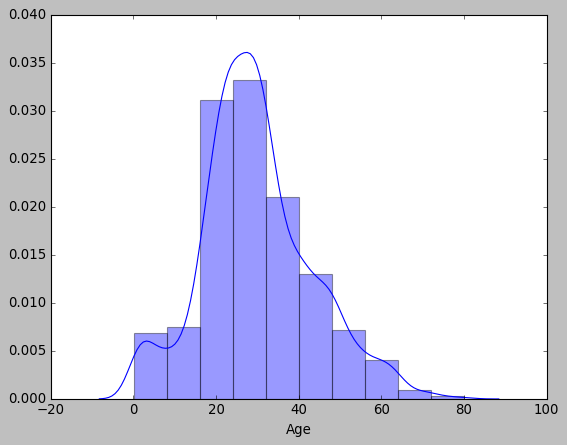

In [13]:
# your code here
sns.distplot(titanic['Age'], bins=10)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

<function matplotlib.pyplot.show(*args, **kw)>

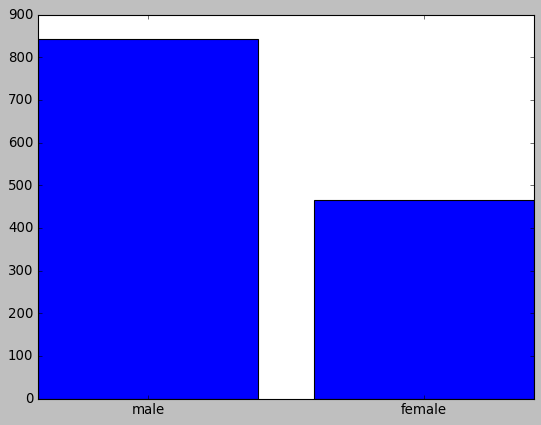

In [21]:
# your code here- 1st way

gender_info=titanic['Gender'].value_counts()
gender_info
plt.bar(gender_info.index,gender_info)
plt.show


<BarContainer object of 2 artists>

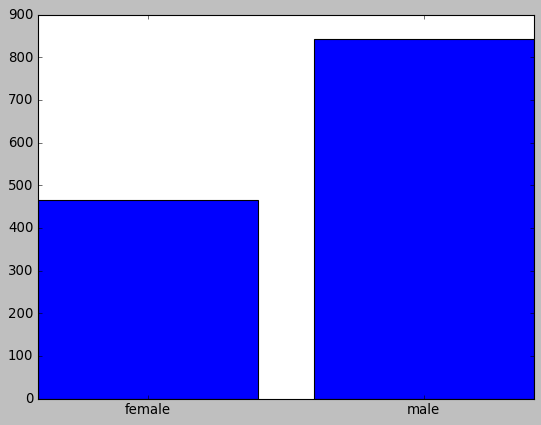

In [14]:
titanic_gender=titanic.pivot_table(index=["Gender"],aggfunc="count")
plt.bar(titanic_gender.index,titanic_gender["Age"])

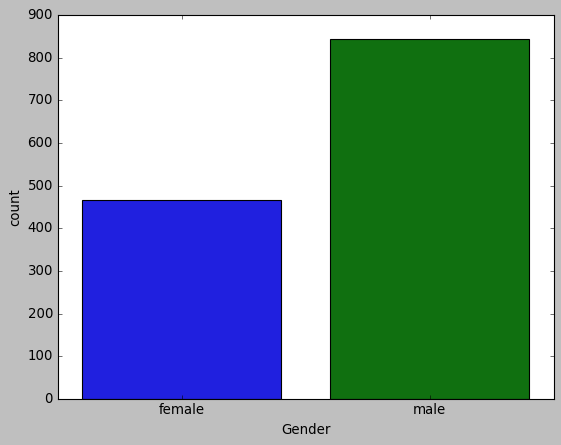

In [27]:
# your code here- 2nd way
#sns.set_theme(style="darkgrid")
ax=sns.countplot(x="Gender", data=titanic)

#### Use the appropriate plot to visualize the column `Pclass` 


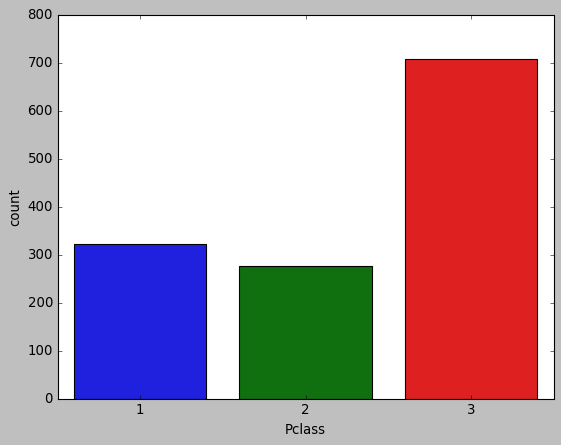

In [28]:
# your code here
ax=sns.countplot(x="Pclass", data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

In [45]:
# your code here
def ranger_f(x):
    if x>0 and x<=10:
        y = "0-10"
    elif x>10 and x<=20:
        y = "11-20"
    elif x>20 and x<=30:
        y = "21-30"
    elif x>30 and x<=40:
        y = "31-40"
    elif x>40 and x<=50:
        y = "41-50"
    elif x>50 and x<=60:
        y = "51-60"   
    elif x>60 and x<=70:
        y = "61-70" 
    elif x>70 and x<=80:
        y = "71-80" 
    elif x>80:
        y = "80-100"
    return y

titanic['Age Interval'] = titanic['Age'].apply(ranger_f)
titanic.head()
titanic.dtypes

PassengerId        int64
Survived        category
Pclass          category
Name              object
Gender          category
Age              float64
SibSp           category
Parch           category
Ticket            object
Fare             float64
Cabin             object
Embarked        category
Age Interval      object
dtype: object

In [111]:
titanic['Age Interval'] = pd.cut(titanic['Age'], bins=[0,10,20,30,40,50,60,70,80,90,100])
titanic.head()
#titanic.dtypes
#titanic['Age Interval'] = titanic['Age Interval'].astype(str)
ages_pivot = titanic.pivot_table(index=['Age Interval'],aggfunc = 'count' )
ages_pivot

,Age,Cabin,Embarked,Fare,Gender,Name,Parch,PassengerId,Pclass,SibSp,Survived,Ticket
Age Interval,,,,,,,,,,,,
"(0, 10]",89,89,89,89,89,89,89,89,89,89,67,89
"(10, 20]",181,181,181,181,181,181,181,181,181,181,129,181
"(20, 30]",492,492,492,492,492,492,492,492,492,492,317,492
"(30, 40]",281,281,281,281,281,281,281,281,281,281,201,281
"(40, 50]",167,167,167,167,167,167,167,167,167,167,110,167
"(50, 60]",65,65,65,65,65,65,65,65,65,65,44,65
"(60, 70]",28,28,28,28,28,28,28,28,28,28,18,28
"(70, 80]",6,6,6,6,6,6,6,6,6,6,5,6
"(80, 90]",0,0,0,0,0,0,0,0,0,0,0,0


The averages ages is: 29.87918569825532


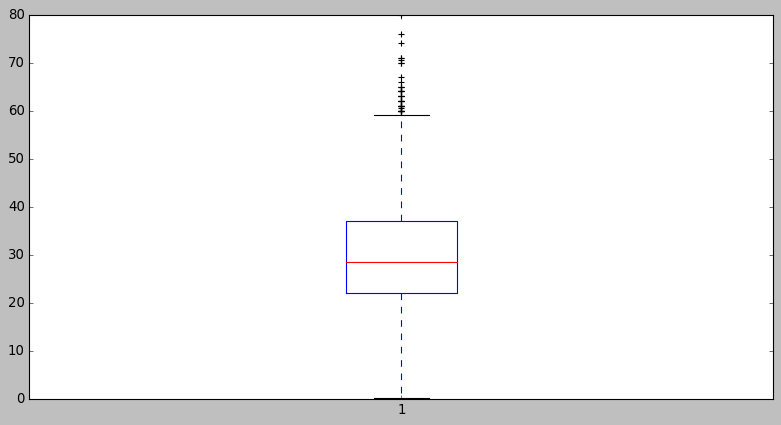

In [67]:
print('The averages ages is:',titanic['Age'].mean())
plt.figure(figsize = (12, 6))
plt.boxplot(titanic['Age'])
plt.show;

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
#La media de edad es aproximadamente 30 años, la mayor 
#The average age is 29.9 year. The 50% of the ages is betwenn 24 and 38. The outlier are above 59 age.
#The ages above 40 represent de 25% of the data.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

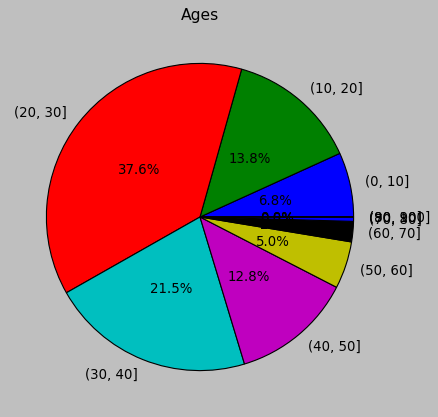

In [82]:
#your code here
pie, ax = plt.subplots(figsize=[10,6])
labels = ages_pivot['Age']/1309 *100
plt.pie(ages_pivot['Age'], autopct="%.1f%%",labels = ages_pivot.index, pctdistance=0.5)
plt.title("Ages", fontsize=14);
#pie.savefig("Ages.png")

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
#The biger group is de 20 at 30 age with a 37.6% of the participants, followed for the thirty-forty group.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

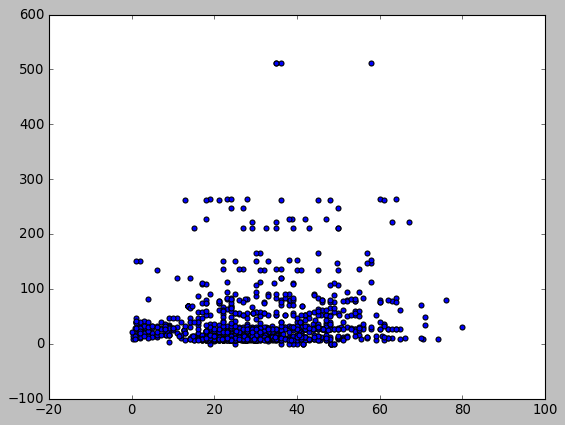

In [83]:
#your code-1st way
plt.scatter(titanic['Age'],titanic['Fare'])

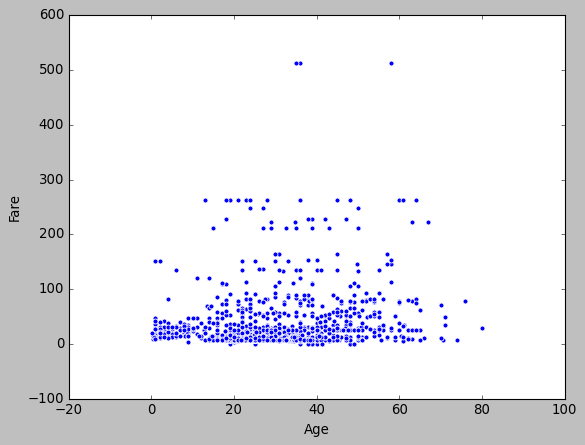

In [84]:
# your code-2nd way
sns.scatterplot(data=titanic, x = 'Age', y = 'Fare')

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

In [92]:
titanic.dtypes

PassengerId        int64
Survived        category
Pclass          category
Name              object
Gender          category
Age              float64
SibSp           category
Parch           category
Ticket            object
Fare             float64
Cabin             object
Embarked        category
Age Interval    category
dtype: object

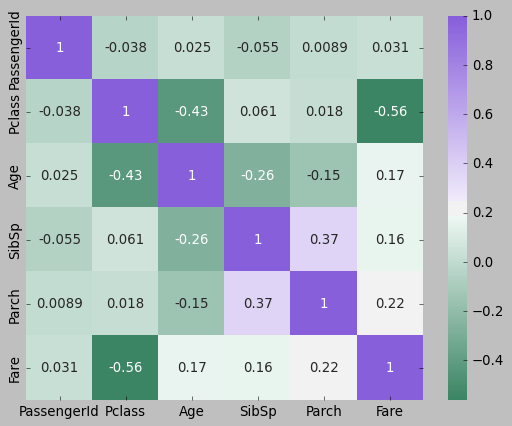

In [108]:
#your code here
titanic_corr = titanic.corr()
cmap = sns.diverging_palette(150,275,as_cmap=True)
sns.heatmap(titanic_corr,cmap=cmap,annot=True);


#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
#The most correlated feature is Parch SibSp

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

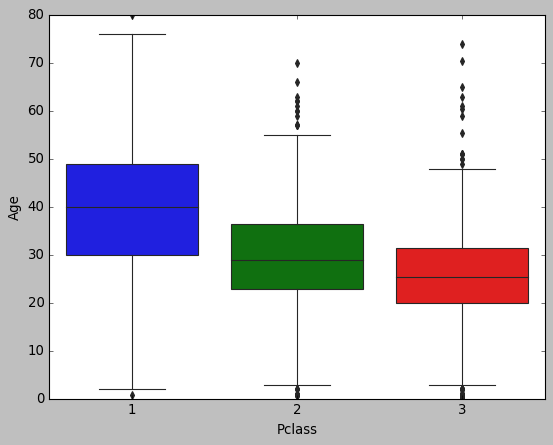

In [110]:
#your code here
sns.boxplot(data = titanic, x ='Pclass' , y = 'Age')

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

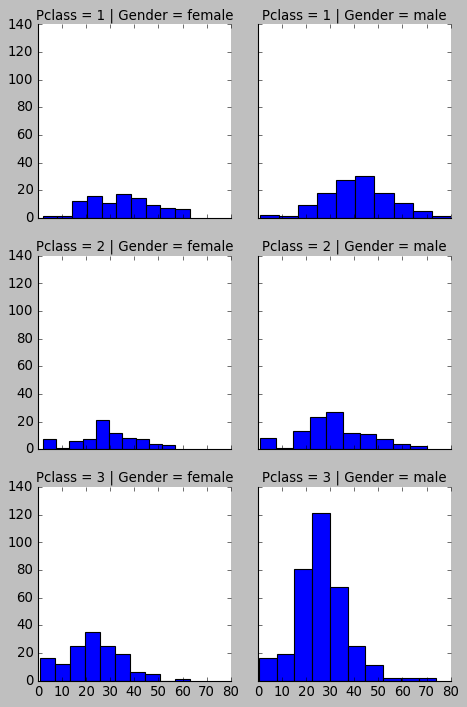

In [18]:
#your code here
g = sns.FacetGrid(data = titanic, col="Gender", row = 'Pclass')
g.map_dataframe(plt.hist, x="Age")